

# Load the behaviors.tsv and news.tsv files




In [1]:
import pandas as pd

# Load the behaviors.tsv and news.tsv files
behaviors_df = pd.read_csv('MINDsmall_train/behaviors.tsv', sep='\t')
news_df = pd.read_csv('MINDsmall_train/news.tsv', sep='\t')

# Print the first few rows from both files
behaviors_df.columns = ['Impression ID', 'User ID', 'Time', 'History', 'Impressions']

# Print the first 5 rows from behaviors data
print("Behavior Data (First 5 rows):")
print(behaviors_df[['Impression ID', 'User ID', 'Time', 'History', 'Impressions']].head())




Behavior Data (First 5 rows):
   Impression ID User ID                   Time  \
0              2  U91836  11/12/2019 6:11:30 PM   
1              3  U73700  11/14/2019 7:01:48 AM   
2              4  U34670  11/11/2019 5:28:05 AM   
3              5   U8125  11/12/2019 4:11:21 PM   
4              6  U19739  11/11/2019 6:52:13 PM   

                                             History  \
0  N31739 N6072 N63045 N23979 N35656 N43353 N8129...   
1  N10732 N25792 N7563 N21087 N41087 N5445 N60384...   
2  N45729 N2203 N871 N53880 N41375 N43142 N33013 ...   
3                        N10078 N56514 N14904 N33740   
4  N39074 N14343 N32607 N32320 N22007 N442 N19001...   

                                         Impressions  
0  N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...  
1  N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...  
2                N35729-0 N33632-0 N49685-1 N27581-0  
3  N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...  
4        N21119-1 N53696-0 N33619-1 N25722-0 N2869-

In [2]:
news_df.columns = ['News ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL', 'Title Entities', 'Abstract Entities']

# Print all columns of news_df
print("\nNews Data (All columns):")
print(news_df)


News Data (All columns):
      News ID   Category        SubCategory  \
0      N19639     health         weightloss   
1      N61837       news          newsworld   
2      N53526     health             voices   
3      N38324     health            medical   
4       N2073     sports       football_nfl   
...       ...        ...                ...   
51276  N16909    weather  weathertopstories   
51277  N47585  lifestyle    lifestylefamily   
51278   N7482     sports        more_sports   
51279  N34418     sports         soccer_epl   
51280  N44276      autos        autossports   

                                                   Title  \
0                          50 Worst Habits For Belly Fat   
1      The Cost of Trump's Aid Freeze in the Trenches...   
2      I Was An NBA Wife. Here's How It Affected My M...   
3      How to Get Rid of Skin Tags, According to a De...   
4      Should NFL be able to fine players for critici...   
...                                              

In [ ]:
behaviors_df['Time'] = pd.to_datetime(behaviors_df['Time'], format='%m/%d/%Y %I:%M:%S %p')


print("\nDate Range in the dataset:")
print(behaviors_df['Time'].min(), 'to', behaviors_df['Time'].max())


start_date = pd.to_datetime('2019-11-09')
end_date = pd.to_datetime('2019-11-14')


filtered_users = behaviors_df[(behaviors_df['Time'] >= start_date) & (behaviors_df['Time'] <= end_date)]


print("\nFiltered Users (First 5 rows):")
print(filtered_users[['User ID', 'Time']].head())


Date Range in the dataset:
2019-11-09 00:00:19 to 2019-11-14 23:59:13

Filtered Users (First 5 rows):
  User ID                Time
0  U91836 2019-11-12 18:11:30
2  U34670 2019-11-11 05:28:05
3   U8125 2019-11-12 16:11:21
4  U19739 2019-11-11 18:52:13
5   U8355 2019-11-11 12:22:09


In [ ]:

behaviors_df['History_list'] = behaviors_df['History'].apply(lambda x: str(x).split() if isinstance(x, str) else [])


behaviors_df['Articles_consumed'] = behaviors_df['History_list'].apply(len)


bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100', '100-105', '105-110', '110-115', '115-120', '120-125', '125-130', '130-135', '135-140', '140-145', '145-150', '150-155', '155-160', '160-165', '165-170', '170-175', '175-180', '180-185', '185-190', '190-195']


assert len(bins) - 1 == len(labels), "The number of labels must be one less than the number of bins"


behaviors_df['User_Bin'] = pd.cut(behaviors_df['Articles_consumed'], bins=bins, labels=labels, right=False)


behaviors_df['User_Bin'] = behaviors_df['User_Bin'].fillna('0-5')


print(behaviors_df[['User ID', 'Articles_consumed', 'User_Bin']].head())


  User ID  Articles_consumed User_Bin
0  U91836                 82    80-85
1  U73700                 16    15-20
2  U34670                 10    10-15
3   U8125                  4      0-5
4  U19739                 36    35-40


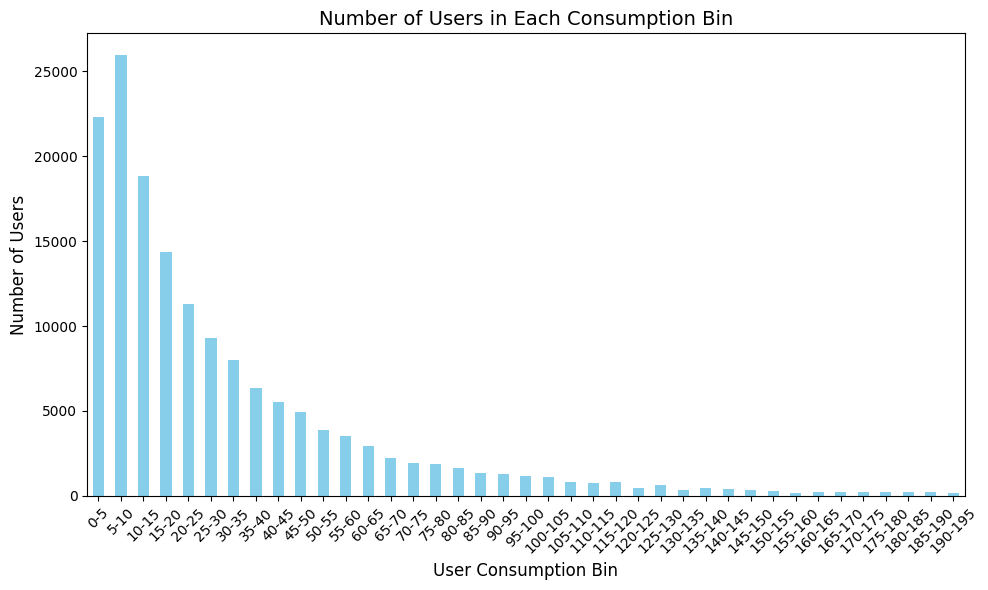

In [ ]:
import matplotlib.pyplot as plt


bin_counts = behaviors_df['User_Bin'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue')


plt.title('Number of Users in Each Consumption Bin', fontsize=14)
plt.xlabel('User Consumption Bin', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
print(behaviors_df.head())

   Impression ID User ID                Time  \
0              2  U91836 2019-11-12 18:11:30   
1              3  U73700 2019-11-14 07:01:48   
2              4  U34670 2019-11-11 05:28:05   
3              5   U8125 2019-11-12 16:11:21   
4              6  U19739 2019-11-11 18:52:13   

                                             History  \
0  N31739 N6072 N63045 N23979 N35656 N43353 N8129...   
1  N10732 N25792 N7563 N21087 N41087 N5445 N60384...   
2  N45729 N2203 N871 N53880 N41375 N43142 N33013 ...   
3                        N10078 N56514 N14904 N33740   
4  N39074 N14343 N32607 N32320 N22007 N442 N19001...   

                                         Impressions  \
0  N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...   
1  N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...   
2                N35729-0 N33632-0 N49685-1 N27581-0   
3  N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...   
4        N21119-1 N53696-0 N33619-1 N25722-0 N2869-0   

                                     

In [7]:
print(behaviors_df.columns)


Index(['Impression ID', 'User ID', 'Time', 'History', 'Impressions',
       'History_list', 'Articles_consumed', 'User_Bin'],
      dtype='object')


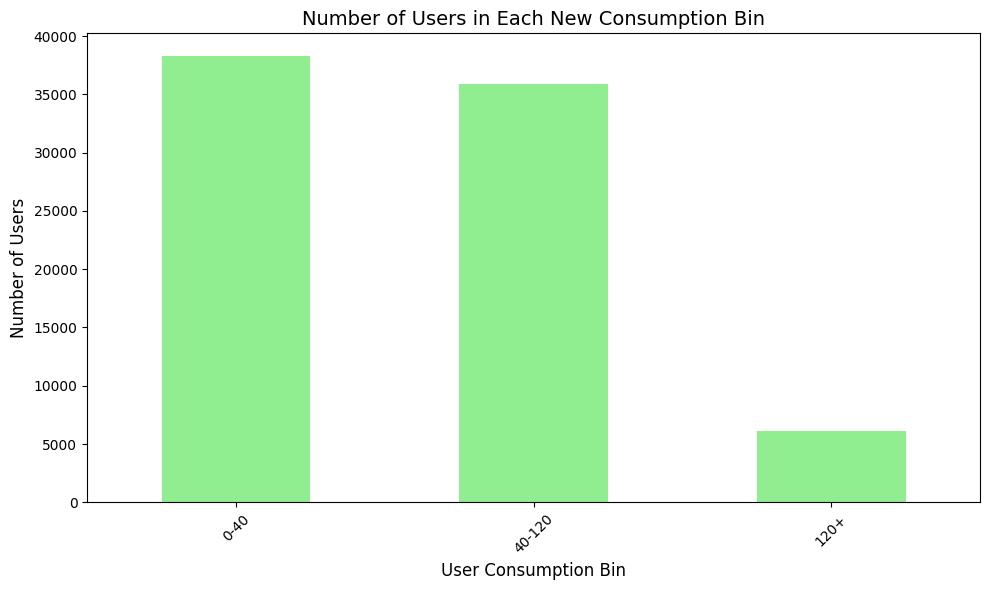

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


if 'Articles_consumed' not in behaviors_df.columns:
    
    behaviors_df['Articles_consumed'] = behaviors_df['History'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)


new_bins = [0, 40, 120, float('inf')]  
new_labels = ['0-40', '40-120', '120+']


behaviors_df['New_User_Bin'] = pd.cut(behaviors_df['Articles_consumed'], bins=new_bins, labels=new_labels, right=False)


first_bin_users = behaviors_df[behaviors_df['New_User_Bin'] == '0-40']
filtered_first_bin_users = first_bin_users.iloc[::3]  # Select every 3th user

# Combine the filtered first bin with the rest of the data
remaining_users = behaviors_df[behaviors_df['New_User_Bin'] != '0-40']
filtered_behaviors_df = pd.concat([filtered_first_bin_users, remaining_users])

# Count the number of users in each new bin
new_bin_counts = filtered_behaviors_df['New_User_Bin'].value_counts().sort_index()

# Plot the graph for the new bins
plt.figure(figsize=(10, 6))
new_bin_counts.plot(kind='bar', color='lightgreen')

# Adding titles and labels
plt.title('Number of Users in Each New Consumption Bin', fontsize=14)
plt.xlabel('User Consumption Bin', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd


if 'Articles_consumed' not in behaviors_df.columns:
    
    behaviors_df['Articles_consumed'] = behaviors_df['History'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)


new_bins = [0, 40, 120, float('inf')]  
new_labels = ['0-40', '40-120', '120+']


behaviors_df['New_User_Bin'] = pd.cut(behaviors_df['Articles_consumed'], bins=new_bins, labels=new_labels, right=False)


first_bin_users = behaviors_df[behaviors_df['New_User_Bin'] == '0-40']
filtered_first_bin_users = first_bin_users.iloc[::3]  


remaining_users = behaviors_df[behaviors_df['New_User_Bin'] != '0-40']
filtered_behaviors_df = pd.concat([filtered_first_bin_users, remaining_users])


behaviors_df['Time'] = pd.to_datetime(behaviors_df['Time'], format='%m/%d/%Y %I:%M:%S %p')


start_train_date = pd.to_datetime('2019-11-09 00:00:00')
end_train_date = pd.to_datetime('2019-11-12 23:59:59')
test_start_date = pd.to_datetime('2019-11-13 00:00:00')
test_end_date = pd.to_datetime('2019-11-14 23:59:59')


bin_datasets = {
    "0-40": filtered_behaviors_df[filtered_behaviors_df['New_User_Bin'] == '0-40'],
    "40-120": filtered_behaviors_df[filtered_behaviors_df['New_User_Bin'] == '40-120'],
    "120+": filtered_behaviors_df[filtered_behaviors_df['New_User_Bin'] == '120+']
}


train_bin_datasets = {}
test_bin_datasets = {}

for bin_label, dataset in bin_datasets.items():
    
    train_bin_datasets[bin_label] = dataset[(dataset['Time'] >= start_train_date) & (dataset['Time'] <= end_train_date)]
    

    test_bin_datasets[bin_label] = dataset[(dataset['Time'] >= test_start_date) & (dataset['Time'] <= test_end_date)]

 
    print(f"Number of entries in train_df for {bin_label} bin:", len(train_bin_datasets[bin_label]))  
    print(f"Number of entries in test_df for {bin_label} bin:", len(test_bin_datasets[bin_label]))  




Number of entries in train_df for 0-40 bin: 23284
Number of entries in test_df for 0-40 bin: 15032
Number of entries in train_df for 40-120 bin: 21450
Number of entries in test_df for 40-120 bin: 14462
Number of entries in train_df for 120+ bin: 3573
Number of entries in test_df for 120+ bin: 2533


In [ ]:
import pandas as pd


def calculate_bin_statistics(dataset):
    return dataset.groupby('New_User_Bin')['Articles_consumed'].agg(
        Count='count',
        Min='min',
        Q1=lambda x: x.quantile(0.25),
        Median='median',
        Q3=lambda x: x.quantile(0.75),
        Max='max'
    ).reset_index()


bin_statistics = {}


for bin_label in ['0-40', '40-120', '120+']:
    
    train_data = train_bin_datasets.get(bin_label, pd.DataFrame())  
    test_data = test_bin_datasets.get(bin_label, pd.DataFrame()) 
    
    # Calculate statistics for train and test datasets
    train_stats = calculate_bin_statistics(train_data)
    test_stats = calculate_bin_statistics(test_data)
    
    # Filter and print statistics for only the current bin label
    print(f"Statistics for {bin_label} bin (Train Data):")
    print(train_stats[train_stats['New_User_Bin'] == bin_label])
    print(f"Statistics for {bin_label} bin (Test Data):")
    print(test_stats[test_stats['New_User_Bin'] == bin_label])
    print()


Statistics for 0-40 bin (Train Data):
  New_User_Bin  Count  Min   Q1  Median    Q3   Max
0         0-40  23284  0.0  6.0    12.0  22.0  39.0
Statistics for 0-40 bin (Test Data):
  New_User_Bin  Count  Min   Q1  Median    Q3   Max
0         0-40  15032  0.0  6.0    12.0  23.0  39.0

Statistics for 40-120 bin (Train Data):
  New_User_Bin  Count   Min    Q1  Median    Q3    Max
1       40-120  21450  40.0  48.0    60.0  80.0  119.0
Statistics for 40-120 bin (Test Data):
  New_User_Bin  Count   Min    Q1  Median    Q3    Max
1       40-120  14462  40.0  47.0    59.0  79.0  119.0

Statistics for 120+ bin (Train Data):
  New_User_Bin  Count    Min     Q1  Median     Q3    Max
2         120+   3573  120.0  136.0   156.0  190.0  558.0
Statistics for 120+ bin (Test Data):
  New_User_Bin  Count    Min     Q1  Median     Q3    Max
2         120+   2533  120.0  136.0   161.0  195.0  558.0



C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\2870501144.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return dataset.groupby('New_User_Bin')['Articles_consumed'].agg(
C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\2870501144.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return dataset.groupby('New_User_Bin')['Articles_consumed'].agg(
C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\2870501144.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt th

# Function to get unique categories and subcategories for a user's reading history

In [ ]:
import pandas as pd


def get_user_categories_and_subcategories(user_history):
    if isinstance(user_history, str):
        history_articles = user_history.split()
        categories = news_df.loc[news_df['News ID'].isin(history_articles), 'Category'].unique()
        subcategories = news_df.loc[news_df['News ID'].isin(history_articles), 'SubCategory'].unique()
        return set(categories), set(subcategories)
    else:
        return set(), set()


def calculate_categories_and_subcategories(bin_datasets):
    for bin_label, dataset in bin_datasets.items():
        
        dataset['User_Categories'], dataset['User_Subcategories'] = zip(*dataset['History'].apply(get_user_categories_and_subcategories))

        
        dataset['Num_Categories'] = dataset['User_Categories'].apply(len)
        dataset['Num_Subcategories'] = dataset['User_Subcategories'].apply(len)

        
        print(f"Statistics for {bin_label} bin:")
        print(dataset[['User ID', 'Num_Categories', 'Num_Subcategories']].head())
        print()


print("Train Dataset Statistics:")
calculate_categories_and_subcategories(train_bin_datasets)

print("Test Dataset Statistics:")
calculate_categories_and_subcategories(test_bin_datasets)


Train Dataset Statistics:


C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\3354641393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'], dataset['User_Subcategories'] = zip(*dataset['History'].apply(get_user_categories_and_subcategories))
C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\3354641393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'], dataset['User_Subcategories'] = zip(*dataset['History'].apply(get_user_categories_and_subcategories))
C:\Users\sanka\AppData\L

Statistics for 0-40 bin:
   User ID  Num_Categories  Num_Subcategories
4   U19739              10                 18
15   U8312              10                 16
23  U67119               9                 11
30   U6744               3                  3
34  U50695               9                 17



C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\3354641393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'], dataset['User_Subcategories'] = zip(*dataset['History'].apply(get_user_categories_and_subcategories))
C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\3354641393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'], dataset['User_Subcategories'] = zip(*dataset['History'].apply(get_user_categories_and_subcategories))
C:\Users\sanka\AppData\L

Statistics for 40-120 bin:
   User ID  Num_Categories  Num_Subcategories
0   U91836              11                 21
11  U92486              11                 21
13  U63162              11                 36
20  U80798              12                 40
29  U85394              12                 32



C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\3354641393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'], dataset['User_Subcategories'] = zip(*dataset['History'].apply(get_user_categories_and_subcategories))
C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\3354641393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'], dataset['User_Subcategories'] = zip(*dataset['History'].apply(get_user_categories_and_subcategories))
C:\Users\sanka\AppData\L

Statistics for 120+ bin:
    User ID  Num_Categories  Num_Subcategories
22    U9306              14                 44
35   U49572              11                 32
61   U54128              12                 28
101  U29279              14                 61
160  U46937              14                 65

Test Dataset Statistics:


C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\3354641393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'], dataset['User_Subcategories'] = zip(*dataset['History'].apply(get_user_categories_and_subcategories))
C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\3354641393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'], dataset['User_Subcategories'] = zip(*dataset['History'].apply(get_user_categories_and_subcategories))
C:\Users\sanka\AppData\L

Statistics for 0-40 bin:
   User ID  Num_Categories  Num_Subcategories
1   U73700               8                 12
7   U79199               7                 11
26  U44808               7                 13
50    U700               8                 15
53  U45798               3                  5



C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\3354641393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'], dataset['User_Subcategories'] = zip(*dataset['History'].apply(get_user_categories_and_subcategories))
C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\3354641393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'], dataset['User_Subcategories'] = zip(*dataset['History'].apply(get_user_categories_and_subcategories))
C:\Users\sanka\AppData\L

Statistics for 40-120 bin:
   User ID  Num_Categories  Num_Subcategories
9   U89744               9                 22
10  U10045               7                 17
12  U29155              12                 27
18  U47654              11                 22
21  U19722              13                 33

Statistics for 120+ bin:
    User ID  Num_Categories  Num_Subcategories
19   U70879              11                 50
79   U47892              13                 34
136  U51456              14                 43
159  U21705              13                 56
482   U2906               8                 23



C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\3354641393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'], dataset['User_Subcategories'] = zip(*dataset['History'].apply(get_user_categories_and_subcategories))
C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\3354641393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'], dataset['User_Subcategories'] = zip(*dataset['History'].apply(get_user_categories_and_subcategories))
C:\Users\sanka\AppData\L

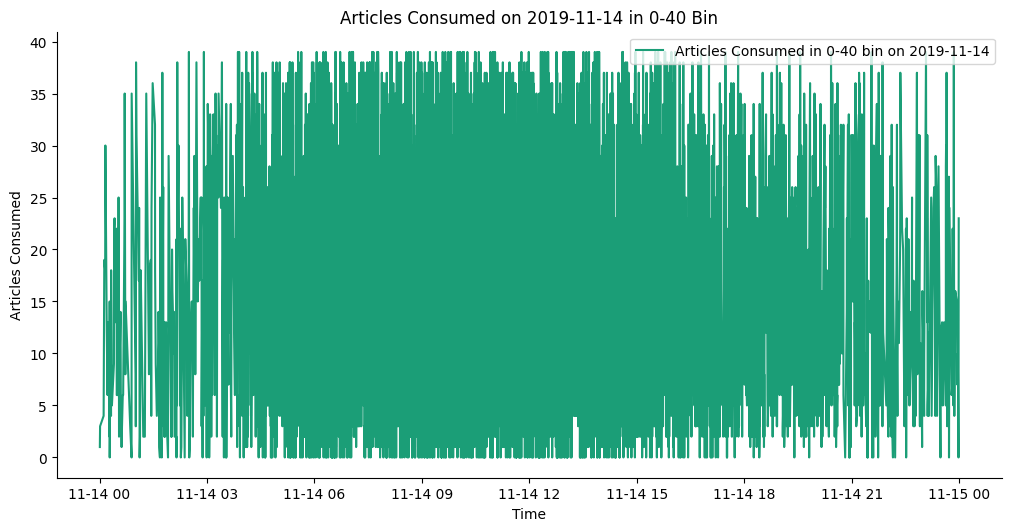

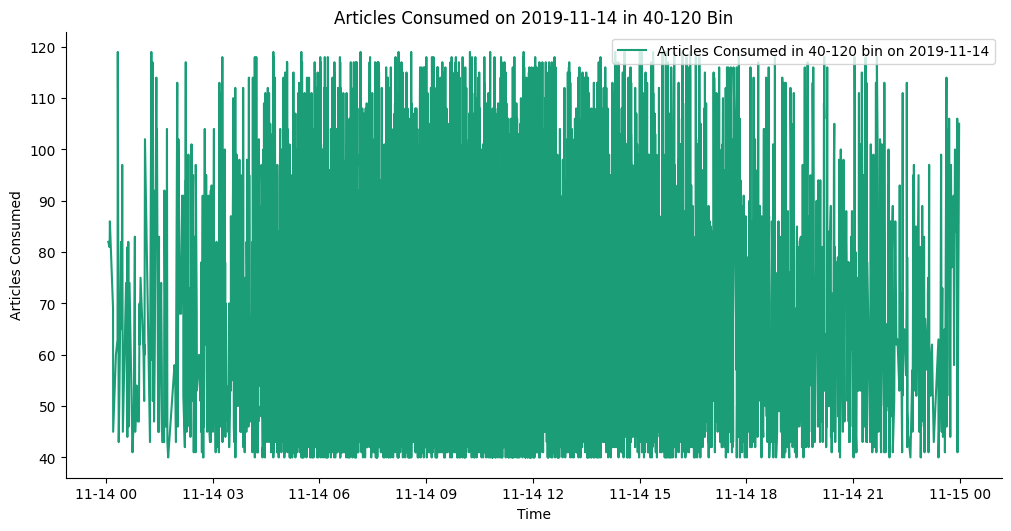

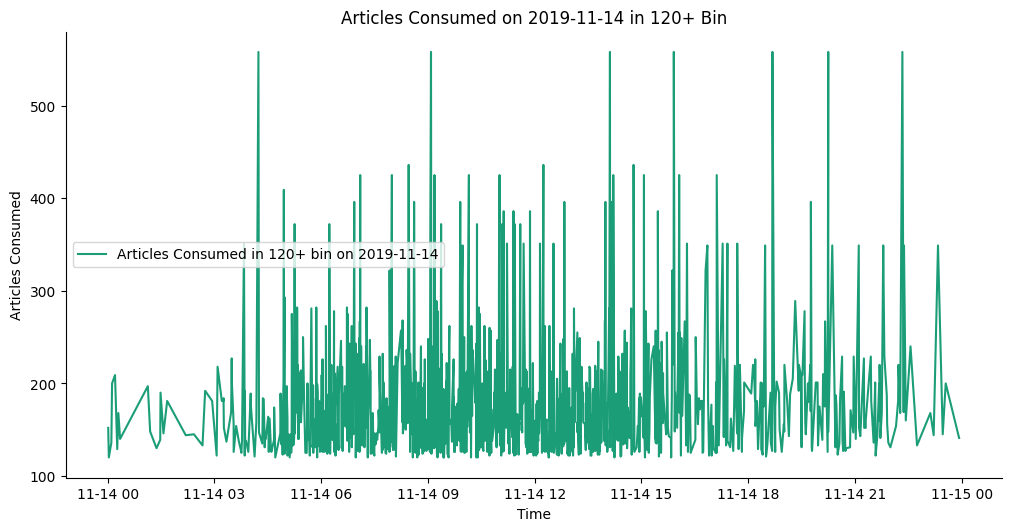

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Time']
    ys = series['Articles_consumed']
    
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

def plot_for_bin_and_day(bin_datasets, date='2019-11-09', bin_label='0-40'):
    """
    Plots the number of articles consumed over time for a specific bin dataset and day.
    """
    # Get the specific bin dataset from bin_datasets
    dataset = bin_datasets.get(bin_label, pd.DataFrame())
    
    # Filter the data for the specific date
    df_filtered = dataset[dataset['Time'].dt.date == pd.to_datetime(date).date()]
    
    # Sort the filtered data by time
    df_sorted = df_filtered.sort_values('Time', ascending=True)
    
    # Plot the data for the selected bin and day
    fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
    _plot_series(df_sorted, f'Articles Consumed in {bin_label} bin on {date}')
    sns.despine(fig=fig, ax=ax)
    
    # Adding labels and title
    plt.xlabel('Time')
    plt.ylabel('Articles Consumed')
    plt.title(f'Articles Consumed on {date} in {bin_label} Bin')
    plt.legend()
    plt.show()

# Example usage for a specific bin and day
# Assuming test_bin_datasets is the dictionary containing the test datasets for each bin
plot_for_bin_and_day(test_bin_datasets, date='2019-11-14', bin_label='0-40')
plot_for_bin_and_day(test_bin_datasets, date='2019-11-14', bin_label='40-120')
plot_for_bin_and_day(test_bin_datasets, date='2019-11-14', bin_label='120+')


# Function to get unique categories and subcategories for a user's reading history


# Function to get unique categories for a user's reading history (ignoring subcategories)

In [26]:
import pandas as pd

# Assuming that the 'news_df' DataFrame has been loaded and contains 'News ID', 'Category', and 'SubCategory' columns

# Function to get user categories based on history
def get_user_categories(user_history):
    if isinstance(user_history, str):
        history_articles = user_history.split()
        categories = news_df.loc[news_df['News ID'].isin(history_articles), 'Category'].unique()
        return set(categories)
    else:
        return set()

# Ensure 'User_Categories' column is calculated for each dataset in train_bin_datasets
def add_user_categories_to_bins(bin_datasets):
    for bin_label, dataset in bin_datasets.items():
        dataset['User_Categories'] = dataset['History'].apply(get_user_categories)
        # Ensure this column is present before proceeding with further calculations
        print(f"User_Categories for {bin_label} bin added. Sample data:")
        print(dataset[['User ID', 'User_Categories']].head())

# Add User_Categories to each bin dataset



In [ ]:
def calculate_normalized_homophily(user_categories, test_categories):
    intersection_size = len(user_categories.intersection(test_categories))
    total_categories = len(user_categories.union(test_categories))
    if total_categories == 0:
        return 0.0
    return intersection_size / total_categories

# Function to add User_Categories to each bin dataset
def add_user_categories_to_bins(bin_datasets):
    for bin_label, dataset in bin_datasets.items():
        dataset['User_Categories'] = dataset['History'].apply(get_user_categories)
        print(f"User_Categories for {bin_label} bin added. Sample data:")
        print(dataset[['User ID', 'User_Categories']].head())

# Add User_Categories to each bin dataset
add_user_categories_to_bins(train_bin_datasets)
add_user_categories_to_bins(test_bin_datasets)  # If needed for test_bin_datasets

# Function to calculate homophily scores for each bin
def calculate_homophily_scores(bin_datasets, test_df):
    for bin_label, dataset in bin_datasets.items():
        # Using the train_bin_datasets to calculate homophily with the test dataset
        if bin_label in train_bin_datasets:
            test_categories = dataset['User_Categories'].iloc[0]  
            train_dataset = train_bin_datasets[bin_label]
            
            
            train_dataset.loc[:, 'Normalized_Homophily_Score'] = train_dataset.apply(
                lambda row: calculate_normalized_homophily(
                    row['User_Categories'], test_categories
                ), axis=1
            )
            
            
            mean_score = train_dataset['Normalized_Homophily_Score'].mean()
            variance_score = train_dataset['Normalized_Homophily_Score'].var()
            
            print(f"Bin: {bin_label}")
            print(f"  Mean Normalized Homophily Score: {mean_score:.4f}")
            print(f"  Variance of Normalized Homophily Score: {variance_score:.4f}\n")


calculate_homophily_scores(train_bin_datasets, test_bin_datasets)

C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\1549536340.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'] = dataset['History'].apply(get_user_categories)


User_Categories for 0-40 bin added. Sample data:
   User ID                                    User_Categories
4   U19739  {sports, health, foodanddrink, news, autos, tv...
15   U8312  {sports, health, foodanddrink, movies, news, t...
23  U67119  {health, movies, foodanddrink, news, tv, enter...
30   U6744                                  {tv, news, video}
34  U50695  {health, sports, movies, foodanddrink, autos, ...


C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\1549536340.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'] = dataset['History'].apply(get_user_categories)


User_Categories for 40-120 bin added. Sample data:
   User ID                                    User_Categories
0   U91836  {sports, health, foodanddrink, movies, news, t...
11  U92486  {sports, health, foodanddrink, movies, news, t...
13  U63162  {sports, health, foodanddrink, news, autos, tv...
20  U80798  {health, sports, movies, foodanddrink, autos, ...
29  U85394  {health, sports, movies, foodanddrink, news, a...


C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\1549536340.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'] = dataset['History'].apply(get_user_categories)


User_Categories for 120+ bin added. Sample data:
    User ID                                    User_Categories
22    U9306  {sports, health, movies, foodanddrink, news, a...
35   U49572  {sports, health, foodanddrink, movies, autos, ...
61   U54128  {sports, health, foodanddrink, news, tv, trave...
101  U29279  {health, sports, foodanddrink, movies, news, a...
160  U46937  {health, sports, foodanddrink, movies, news, a...


C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\1549536340.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'] = dataset['History'].apply(get_user_categories)


User_Categories for 0-40 bin added. Sample data:
   User ID                                    User_Categories
1   U73700  {sports, foodanddrink, news, autos, tv, financ...
7   U79199  {sports, news, tv, travel, weather, lifestyle,...
26  U44808  {sports, foodanddrink, news, tv, travel, finan...
50    U700  {sports, movies, foodanddrink, autos, news, fi...
53  U45798                            {sports, finance, news}


C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\1549536340.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'] = dataset['History'].apply(get_user_categories)


User_Categories for 40-120 bin added. Sample data:
   User ID                                    User_Categories
9   U89744  {sports, movies, news, finance, entertainment,...
10  U10045  {sports, foodanddrink, autos, news, tv, financ...
12  U29155  {sports, health, movies, foodanddrink, news, a...
18  U47654  {sports, health, foodanddrink, movies, news, t...
21  U19722  {health, sports, foodanddrink, movies, news, a...


C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\1549536340.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Categories'] = dataset['History'].apply(get_user_categories)


User_Categories for 120+ bin added. Sample data:
    User ID                                    User_Categories
19   U70879  {health, sports, foodanddrink, movies, autos, ...
79   U47892  {sports, health, movies, news, autos, tv, trav...
136  U51456  {sports, health, foodanddrink, movies, autos, ...
159  U21705  {health, sports, movies, foodanddrink, news, a...
482   U2906  {sports, news, autos, tv, travel, finance, ent...
Bin: 0-40
  Mean Normalized Homophily Score: 0.3743
  Variance of Normalized Homophily Score: 0.0306

Bin: 40-120
  Mean Normalized Homophily Score: 0.6390
  Variance of Normalized Homophily Score: 0.0135

Bin: 120+
  Mean Normalized Homophily Score: 0.8994
  Variance of Normalized Homophily Score: 0.0114



C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\3482425305.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


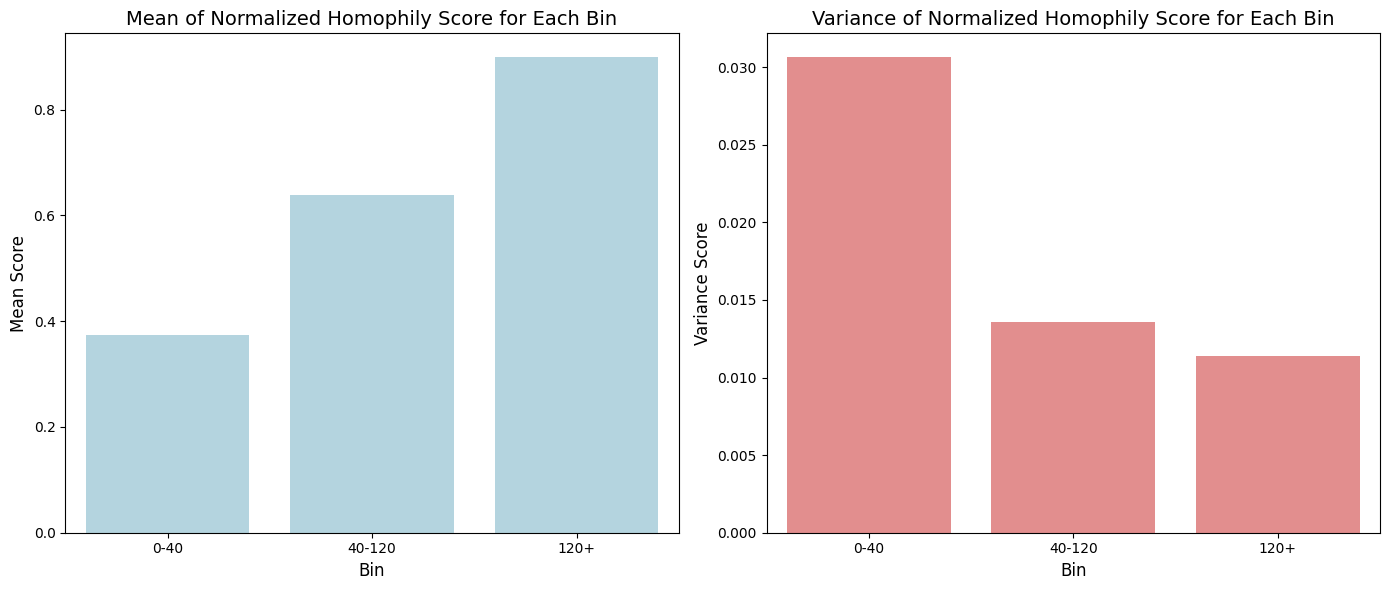

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
bins = ['0-40', '40-120', '120+']
mean_scores = [0.3743, 0.63905, 0.8994]  # Replace these with actual mean values
variance_scores = [0.03065, 0.01357, 0.0114]  # Replace these with actual variance values

# Create a DataFrame to hold the data
import pandas as pd
data = pd.DataFrame({
    'Bin': bins,
    'Mean': mean_scores,
    'Variance': variance_scores
})

# Plot Mean and Variance side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), layout='constrained')

# Plot Mean values
sns.barplot(x='Bin', y='Mean', data=data, color='lightblue', ax=ax1)
ax1.set_title('Mean of Normalized Homophily Score for Each Bin', fontsize=14)
ax1.set_xlabel('Bin', fontsize=12)
ax1.set_ylabel('Mean Score', fontsize=12)

# Plot Variance values
sns.barplot(x='Bin', y='Variance', data=data, color='lightcoral', ax=ax2)
ax2.set_title('Variance of Normalized Homophily Score for Each Bin', fontsize=14)
ax2.set_xlabel('Bin', fontsize=12)
ax2.set_ylabel('Variance Score', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()


In [18]:
from collections import defaultdict

def calculate_daily_category_percentage(df):
    daily_category_counts = defaultdict(lambda: defaultdict(int))
    daily_total_counts = defaultdict(lambda: defaultdict(int))

    for index, row in df.iterrows():
        user_id = row['User ID']
        date = row['Time'].date()  
        categories = get_user_categories(row['History'])

        for category in categories:
            daily_category_counts[user_id][(date, category)] += 1
        daily_total_counts[user_id][date] += len(categories)

    daily_category_percentages = defaultdict(lambda: defaultdict(float))
    for user_id, category_counts in daily_category_counts.items():
        for (date, category), count in category_counts.items():
            daily_category_percentages[user_id][(date, category)] = (count / daily_total_counts[user_id][date]) * 100 if daily_total_counts[user_id][date] else 0

    return daily_category_percentages


daily_percentages = calculate_daily_category_percentage(train_df)



for user_id in list(daily_percentages.keys())[:5]:  
    print(f"User ID: {user_id}")
    for (date, category), percentage in daily_percentages[user_id].items():
        print(f"  Date: {date}, Category: {category}, Percentage: {percentage:.2f}%")

User ID: U91836
  Date: 2019-11-12, Category: health, Percentage: 9.09%
  Date: 2019-11-12, Category: music, Percentage: 9.09%
  Date: 2019-11-12, Category: foodanddrink, Percentage: 9.09%
  Date: 2019-11-12, Category: sports, Percentage: 9.09%
  Date: 2019-11-12, Category: travel, Percentage: 9.09%
  Date: 2019-11-12, Category: lifestyle, Percentage: 9.09%
  Date: 2019-11-12, Category: weather, Percentage: 9.09%
  Date: 2019-11-12, Category: video, Percentage: 9.09%
  Date: 2019-11-12, Category: finance, Percentage: 9.09%
  Date: 2019-11-12, Category: movies, Percentage: 9.09%
  Date: 2019-11-12, Category: news, Percentage: 9.09%
  Date: 2019-11-09, Category: health, Percentage: 9.09%
  Date: 2019-11-09, Category: music, Percentage: 9.09%
  Date: 2019-11-09, Category: foodanddrink, Percentage: 9.09%
  Date: 2019-11-09, Category: sports, Percentage: 9.09%
  Date: 2019-11-09, Category: travel, Percentage: 9.09%
  Date: 2019-11-09, Category: lifestyle, Percentage: 9.09%
  Date: 2019-11-0

In [ ]:

def get_user_subcategories(user_history):
    if isinstance(user_history, str):
        history_articles = user_history.split()
        subcategories = news_df.loc[news_df['News ID'].isin(history_articles), 'SubCategory'].unique()
        return set(subcategories)
    else:
        return set()


def add_user_subcategories_to_bins(bin_datasets):
    for bin_label, dataset in bin_datasets.items():
        dataset['User_Subcategories'] = dataset['History'].apply(get_user_subcategories)
        print(f"User_Subcategories for {bin_label} bin added. Sample data:")
        print(dataset[['User ID', 'User_Subcategories']].head())


add_user_subcategories_to_bins(train_bin_datasets)
add_user_subcategories_to_bins(test_bin_datasets) 


def calculate_normalized_homophily_subcategory(user_subcategories, test_subcategories):
    intersection_size = len(user_subcategories.intersection(test_subcategories))
    total_subcategories = len(user_subcategories.union(test_subcategories))
    if total_subcategories == 0:
        return 0.0
    return intersection_size / total_subcategories


def calculate_homophily_scores_subcategory(bin_datasets, test_df):
    for bin_label, dataset in bin_datasets.items():
       
        if bin_label in train_bin_datasets:
            test_subcategories = dataset['User_Subcategories'].iloc[0] 
            train_dataset = train_bin_datasets[bin_label]
            
            
            train_dataset.loc[:, 'Normalized_Homophily_Subcategory_Score'] = train_dataset.apply(
                lambda row: calculate_normalized_homophily_subcategory(
                    row['User_Subcategories'], test_subcategories
                ), axis=1
            )
            
            
            mean_score = train_dataset['Normalized_Homophily_Subcategory_Score'].mean()
            variance_score = train_dataset['Normalized_Homophily_Subcategory_Score'].var()
            
            print(f"Bin: {bin_label}")
            print(f"  Mean Normalized Homophily Subcategory Score: {mean_score:.4f}")
            print(f"  Variance of Normalized Homophily Subcategory Score: {variance_score:.4f}\n")


calculate_homophily_scores_subcategory(train_bin_datasets, test_bin_datasets)



C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\181502022.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Subcategories'] = dataset['History'].apply(get_user_subcategories)


User_Subcategories for 0-40 bin added. Sample data:
   User ID                                 User_Subcategories
4   U19739  {autosnews, newsus, entertainment-celebrity, h...
15   U8312  {newsus, health-news, tv-celebrity, recipes, f...
23  U67119  {music-gallery, restaurantsandnews, tv-celebri...
30   U6744                  {newsus, lifestyle, tv-celebrity}
34  U50695  {autosnews, newsus, autosluxury, health-news, ...


C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\181502022.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Subcategories'] = dataset['History'].apply(get_user_subcategories)


User_Subcategories for 40-120 bin added. Sample data:
   User ID                                 User_Subcategories
0   U91836  {newsus, restaurantsandnews, traveltips, newsc...
11  U92486  {newsus, movienews, tvnews, celebrity, newspho...
13  U63162  {newsus, wellness, restaurantsandnews, music-c...
20  U80798  {newsus, newsfactcheck, shop-all, tvnews, base...
29  U85394  {newsus, wellness, more_sports, finance-top-st...


C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\181502022.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Subcategories'] = dataset['History'].apply(get_user_subcategories)


User_Subcategories for 120+ bin added. Sample data:
    User ID                                 User_Subcategories
22    U9306  {wellness, newsus, music-celebrity, more_sport...
35   U49572  {newsus, restaurantsandnews, tv-gallery, tvnew...
61   U54128  {newsus, restaurantsandnews, newsfactcheck, el...
101  U29279  {newsus, music-gallery, wellness, restaurantsa...
160  U46937  {newsus, wellness, music-gallery, more_sports,...


C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\181502022.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Subcategories'] = dataset['History'].apply(get_user_subcategories)


User_Subcategories for 0-40 bin added. Sample data:
   User ID                                 User_Subcategories
1   U73700  {autosnews, newsus, tvvideos, shop-holidays, w...
7   U79199  {newsus, tv-celebrity, basketball_nba, newspol...
26  U44808  {entertainment-books, newsus, restaurantsandne...
50    U700  {autosnews, movies-celebrity, newsus, restaura...
53  U45798  {newspolitics, personalfinance, football_nfl, ...


C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\181502022.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Subcategories'] = dataset['History'].apply(get_user_subcategories)


User_Subcategories for 40-120 bin added. Sample data:
   User ID                                 User_Subcategories
9   U89744  {newsus, music-celebrity, lifestylecelebstyle,...
10  U10045  {autosreview, autosnews, newsus, restaurantsan...
12  U29155  {music-gallery, newsus, music-celebrity, resta...
18  U47654  {newsus, music-gallery, finance-taxes, tv-gall...
21  U19722  {newsus, wellness, celebrity, baseball_mlb, ne...


C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\181502022.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Subcategories'] = dataset['History'].apply(get_user_subcategories)
C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\181502022.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset.loc[:, 'Normalized_Homophily_Subcategory_Score'] = train_dataset.apply(


User_Subcategories for 120+ bin added. Sample data:
    User ID                                 User_Subcategories
19   U70879  {wellness, newsus, restaurantsandnews, more_sp...
79   U47892  {newsus, music-celebrity, more_sports, electio...
136  U51456  {newsus, wellness, music-gallery, restaurantsa...
159  U21705  {newsus, wellness, more_sports, music-celebrit...
482   U2906  {newsus, more_sports, gaming, elections-2020-u...
Bin: 0-40
  Mean Normalized Homophily Subcategory Score: 0.1290
  Variance of Normalized Homophily Subcategory Score: 0.0061

Bin: 40-120
  Mean Normalized Homophily Subcategory Score: 0.2676
  Variance of Normalized Homophily Subcategory Score: 0.0046

Bin: 120+
  Mean Normalized Homophily Subcategory Score: 0.4194
  Variance of Normalized Homophily Subcategory Score: 0.0057



C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\181502022.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset.loc[:, 'Normalized_Homophily_Subcategory_Score'] = train_dataset.apply(
C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\181502022.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset.loc[:, 'Normalized_Homophily_Subcategory_Score'] = train_dataset.apply(


C:\Users\sanka\AppData\Local\Temp\ipykernel_30008\359510848.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


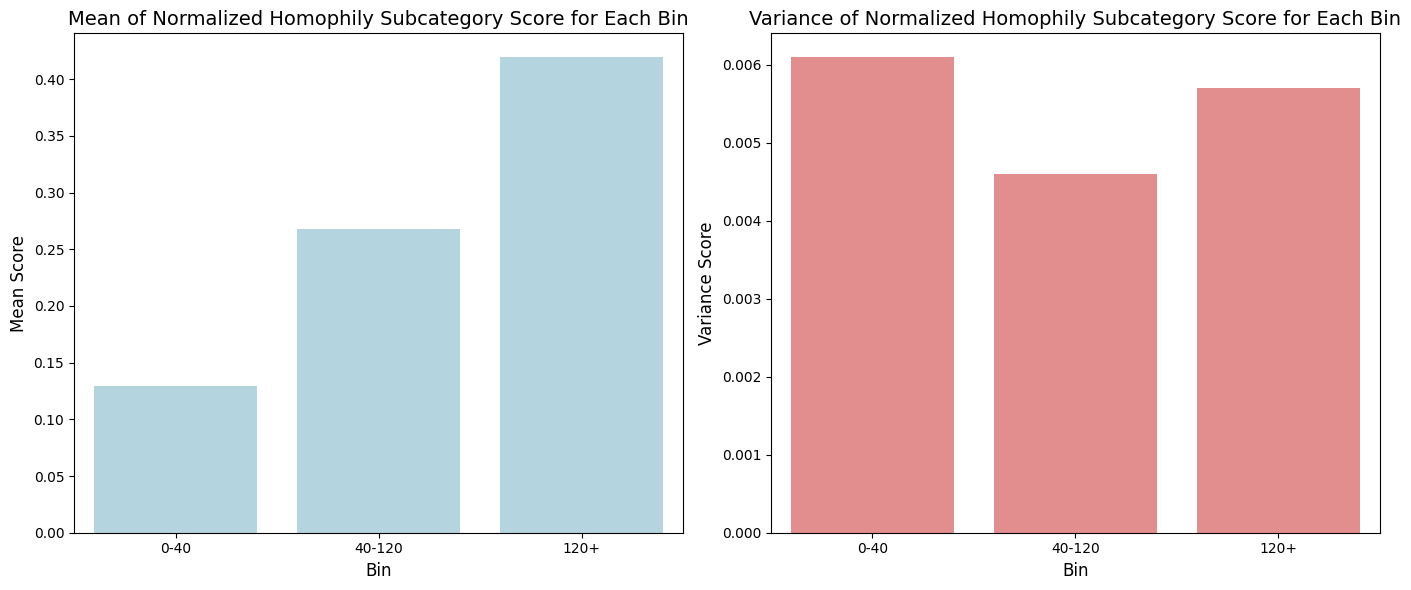

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for plotting
bins = ['0-40', '40-120', '120+']
mean_scores = [0.1290, 0.2676, 0.4194]  
variance_scores = [0.0061, 0.0046, 0.0057] 


data = pd.DataFrame({
    'Bin': bins,
    'Mean': mean_scores,
    'Variance': variance_scores
})


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), layout='constrained')

# Plot Mean values
sns.barplot(x='Bin', y='Mean', data=data, color='lightblue', ax=ax1)
ax1.set_title('Mean of Normalized Homophily Subcategory Score for Each Bin', fontsize=14)
ax1.set_xlabel('Bin', fontsize=12)
ax1.set_ylabel('Mean Score', fontsize=12)

# Plot Variance values
sns.barplot(x='Bin', y='Variance', data=data, color='lightcoral', ax=ax2)
ax2.set_title('Variance of Normalized Homophily Subcategory Score for Each Bin', fontsize=14)
ax2.set_xlabel('Bin', fontsize=12)
ax2.set_ylabel('Variance Score', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()


In [34]:

def calculate_homophily_statistics(bin_datasets):
    for bin_label, dataset in bin_datasets.items():
   
        min_score = dataset['Normalized_Homophily_Score'].min()
        max_score = dataset['Normalized_Homophily_Score'].max()
        median_score = dataset['Normalized_Homophily_Score'].median()
        q1 = dataset['Normalized_Homophily_Score'].quantile(0.25)
        q3 = dataset['Normalized_Homophily_Score'].quantile(0.75)
        
       
        print(f"Bin: {bin_label}")
        print(f"  Min Homophily Score: {min_score:.4f}")
        print(f"  Max Homophily Score: {max_score:.4f}")
        print(f"  Median Homophily Score: {median_score:.4f}")
        print(f"  Q1 (25th percentile) Homophily Score: {q1:.4f}")
        print(f"  Q3 (75th percentile) Homophily Score: {q3:.4f}\n")

# Now calculate the homophily statistics for categories using the bin datasets
calculate_homophily_statistics(train_bin_datasets)


Bin: 0-40
  Min Homophily Score: 0.0000
  Max Homophily Score: 1.0000
  Median Homophily Score: 0.3636
  Q1 (25th percentile) Homophily Score: 0.2500
  Q3 (75th percentile) Homophily Score: 0.5000

Bin: 40-120
  Min Homophily Score: 0.1667
  Max Homophily Score: 1.0000
  Median Homophily Score: 0.6429
  Q1 (25th percentile) Homophily Score: 0.5714
  Q3 (75th percentile) Homophily Score: 0.7143

Bin: 120+
  Min Homophily Score: 0.3571
  Max Homophily Score: 1.0000
  Median Homophily Score: 0.9286
  Q1 (25th percentile) Homophily Score: 0.8571
  Q3 (75th percentile) Homophily Score: 1.0000




# Display the statistics for each bin

In [25]:
def calculate_daily_category_percentage(df):
    """Calculates the daily percentage of different categories read by all users combined.

    Args:
        df: The DataFrame containing user behavior data (behaviors_df or a subset like train_df).

    Returns:
        A dictionary containing daily category percentages for all users combined.
    """

    daily_category_counts = defaultdict(int)  
    daily_total_counts = defaultdict(int)    

    for index, row in df.iterrows():
        date = row['Time'].date()  
        categories = get_user_categories(row['History'])

        for category in categories:
            daily_category_counts[(date, category)] += 1  
        daily_total_counts[date] += len(categories)       

    daily_category_percentages = defaultdict(float)
    for (date, category), count in daily_category_counts.items():
        daily_category_percentages[(date, category)] = (count / daily_total_counts[date]) * 100 if daily_total_counts[date] else 0

    return daily_category_percentages


daily_percentages = calculate_daily_category_percentage(train_df)


print("Daily Category Percentages for All Users (Combined):")
for (date, category), percentage in daily_percentages.items():
    print(f"  Date: {date}, Category: {category}, Percentage: {percentage:.2f}%")

Daily Category Percentages for All Users (Combined):
  Date: 2019-11-12, Category: health, Percentage: 6.90%
  Date: 2019-11-12, Category: music, Percentage: 5.62%
  Date: 2019-11-12, Category: foodanddrink, Percentage: 6.63%
  Date: 2019-11-12, Category: sports, Percentage: 9.55%
  Date: 2019-11-12, Category: travel, Percentage: 5.70%
  Date: 2019-11-12, Category: lifestyle, Percentage: 9.82%
  Date: 2019-11-12, Category: weather, Percentage: 2.99%
  Date: 2019-11-12, Category: video, Percentage: 4.30%
  Date: 2019-11-12, Category: finance, Percentage: 8.65%
  Date: 2019-11-12, Category: movies, Percentage: 6.91%
  Date: 2019-11-12, Category: news, Percentage: 12.46%
  Date: 2019-11-11, Category: tv, Percentage: 9.21%
  Date: 2019-11-11, Category: sports, Percentage: 9.98%
  Date: 2019-11-11, Category: lifestyle, Percentage: 9.77%
  Date: 2019-11-11, Category: video, Percentage: 4.34%
  Date: 2019-11-11, Category: finance, Percentage: 8.71%
  Date: 2019-11-12, Category: autos, Percent

In [28]:
def print_sorted_daily_percentages(daily_percentages):
    # Sort the percentages in descending order by percentage
    sorted_percentages = sorted(daily_percentages.items(), key=lambda x: x[1], reverse=True)
    
    # Group by date and print
    grouped_by_date = defaultdict(list)
    for (date, category), percentage in sorted_percentages:
        grouped_by_date[date].append((category, percentage))
    
    print("Daily Category Percentages for All Users (Combined) - Sorted by Percentage:")
    for date, categories in grouped_by_date.items():
        print(f"Date: {date}")
        for category, percentage in categories:
            print(f"  Category: {category}, Percentage: {percentage:.2f}%")
        print()

# Example usage
daily_percentages = calculate_daily_category_percentage(train_df)
print_sorted_daily_percentages(daily_percentages)

Daily Category Percentages for All Users (Combined) - Sorted by Percentage:
Date: 2019-11-10
  Category: news, Percentage: 13.09%
  Category: sports, Percentage: 9.83%
  Category: lifestyle, Percentage: 9.70%
  Category: finance, Percentage: 8.84%
  Category: tv, Percentage: 8.80%
  Category: movies, Percentage: 6.48%
  Category: foodanddrink, Percentage: 6.46%
  Category: health, Percentage: 6.39%
  Category: entertainment, Percentage: 5.76%
  Category: travel, Percentage: 5.63%
  Category: music, Percentage: 5.25%
  Category: autos, Percentage: 5.12%
  Category: video, Percentage: 4.90%
  Category: weather, Percentage: 3.71%
  Category: kids, Percentage: 0.02%
  Category: middleeast, Percentage: 0.00%

Date: 2019-11-09
  Category: news, Percentage: 12.78%
  Category: sports, Percentage: 9.71%
  Category: lifestyle, Percentage: 9.50%
  Category: finance, Percentage: 9.01%
  Category: tv, Percentage: 8.61%
  Category: foodanddrink, Percentage: 6.61%
  Category: health, Percentage: 6.53